In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
x=data.drop('PM 2.5', axis=1)

In [5]:
y=data['PM 2.5']

In [6]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y, test_size=0.3)

In [7]:
from tensorflow.keras.initializers import HeNormal

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [9]:
model= Sequential()
model.add(Dense(128,kernel_initializer=HeNormal,input_dim=xtr.shape[1],activation='relu'))
model.add(Dense(256, kernel_initializer=HeNormal,activation='relu'))
model.add(Dense(256, kernel_initializer=HeNormal,activation='relu'))
model.add(Dense(256, kernel_initializer=HeNormal,activation='relu'))
model.add(Dense(1, kernel_initializer=HeNormal,activation='linear'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

In [12]:
hist2= model.fit(xtr,ytr, validation_split=0.3, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 362.0355 - mean_absolute_error: 362.0355 - val_loss: 125.7764 - val_mean_absolute_error: 125.7764
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 83.6063 - mean_absolute_error: 83.6063 - val_loss: 59.8784 - val_mean_absolute_error: 59.8784
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 71.4943 - mean_absolute_error: 71.4943 - val_loss: 54.6019 - val_mean_absolute_error: 54.6019
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 67.3482 - mean_absolute_error: 67.3482 - val_loss: 51.8780 - val_mean_absolute_error: 51.8780
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 60.0053 - mean_absolute_error: 60.0053 - val_loss: 62.3226 - val_mean_absolute_error: 62.3226
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 66.1365 - mean_absolute_error: 66.1365 - val_loss: 56.6264 - val_mean_absolute_error: 56

Epoch 50/100
17/17 [==============================] - 0s 3ms/step - loss: 49.6895 - mean_absolute_error: 49.6895 - val_loss: 43.0701 - val_mean_absolute_error: 43.0701
Epoch 51/100
17/17 [==============================] - 0s 3ms/step - loss: 55.1326 - mean_absolute_error: 55.1326 - val_loss: 52.8401 - val_mean_absolute_error: 52.8401
Epoch 52/100
17/17 [==============================] - 0s 3ms/step - loss: 49.8130 - mean_absolute_error: 49.8130 - val_loss: 45.4270 - val_mean_absolute_error: 45.4270
Epoch 53/100
17/17 [==============================] - 0s 3ms/step - loss: 47.7234 - mean_absolute_error: 47.7234 - val_loss: 43.9472 - val_mean_absolute_error: 43.9472
Epoch 54/100
17/17 [==============================] - 0s 3ms/step - loss: 47.3067 - mean_absolute_error: 47.3067 - val_loss: 44.8715 - val_mean_absolute_error: 44.8715
Epoch 55/100
17/17 [==============================] - 0s 3ms/step - loss: 49.1786 - mean_absolute_error: 49.1786 - val_loss: 44.9785 - val_mean_absolute_error: 

Epoch 99/100
17/17 [==============================] - 0s 3ms/step - loss: 47.1434 - mean_absolute_error: 47.1434 - val_loss: 42.5401 - val_mean_absolute_error: 42.5401
Epoch 100/100
17/17 [==============================] - 0s 3ms/step - loss: 47.3581 - mean_absolute_error: 47.3581 - val_loss: 46.1192 - val_mean_absolute_error: 46.1192


In [13]:
ypred= model.predict(xte)

In [14]:
pred=[]
for i in ypred:
    for j in i:
        pred.append(j)

In [15]:
import seaborn as sns

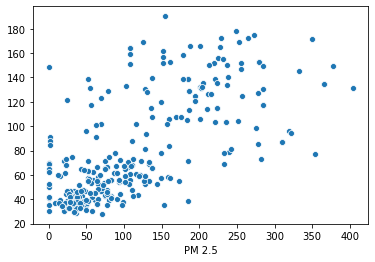

In [16]:
sns.scatterplot(yte,pred)

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(yte, pred))
print('MSE:', metrics.mean_squared_error(yte, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yte, pred)))

MAE: 50.67593510713034
MSE: 5319.410218043231
RMSE: 72.93428698522548
